Pasos para constuir un **DBSCAN** propio.

1. Construir una función que calcule o marque a los vecinos próximos a un punto $x_0$ (núcleo o centro) y un radio $\epsilon$.
2. Agregar esos puntos marcados a un cluster $C$ (Alcanzables Directos).
3. Agregar a los puntos próximos de los próximos, es decir buscar otros puntos nucleo (Alcanzables Todos) y una vez encontrados, agregarlos al cluster $C$.
4. Hacer los pasos 1, 2, 3 para el cluster $i-$ésimo.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

In [2]:
# Genero datos artificiales
X, v = make_blobs(n_samples = 60, centers = 4, cluster_std =  0.60, random_state = 0)

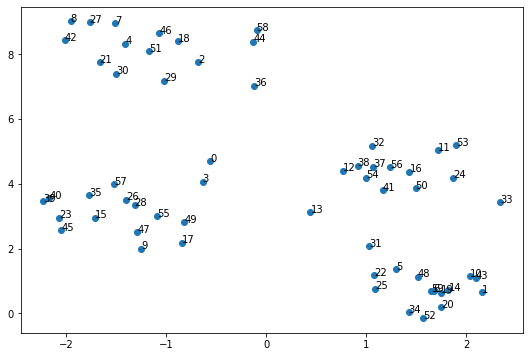

In [3]:
# Scatterplot de los datos generados
plt.figure(figsize=(9, 6))
plt.scatter(X[:,0], X[:,1])

# Genero Etiquetas de las observaciones
N   = len(X)
ind = np.arange(N) 
for label, x, y in zip(ind, X[:,0], X[:,1]):
    plt.annotate(label, xy=(x,y))
plt.show()

In [4]:
# Entreno algoritmo DBSCAN()
clustering = DBSCAN(eps = 1, min_samples = 5)
etiqueta   = clustering.fit_predict(X)

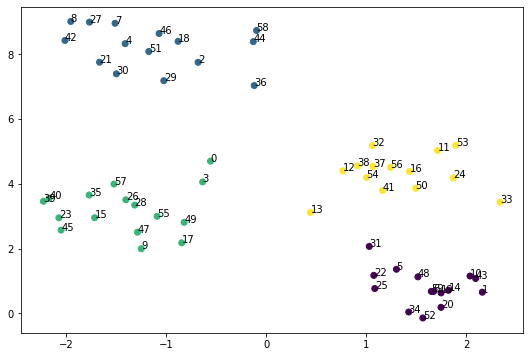

In [5]:
plt.figure(figsize = (9, 6))
plt.scatter(X[:,0], X[:,1], c=etiqueta)

N   = len(X)
ind = np.arange(N)
for label, x, y in zip(ind, X[:,0], X[:,1]):
    plt.annotate(label, xy=(x, y))
plt.show()

---
**Bola Abierta**

Sea $(X,d)$ un espacio métrico, y sea $x_0 \in X$ . Entonces, para cualquier número real $\epsilon>0$, el conjunto:

$$
\begin{eqnarray*}
\mathcal{B}(x_0, \epsilon) = \{ x\in X: d(x_0, x)<\epsilon \}
\end{eqnarray*}
$$

Se llama bola abierta. 


<img src="http://mathonline.wdfiles.com/local--files/path-connectedness-of-open-and-connected-sets-in-euclidean-s/Screen%20Shot%202015-11-14%20at%2012.26.46%20PM.png" width=600 height=300/>

**Regla Vecino más próximo:** $\Vert x_{0} - x \Vert <\epsilon$, con $x_0$ como centro.

In [6]:
# Funcion que busca vecino mas proximo
def buscarVecinos(x0, X, epsilon):
    N       = len(X) # tamaño de datos  
    vecinos = []     # almacena los vecinos mas proximos a un punto centro x0
    
    for i in range(N): 
        if (np.linalg.norm(x0 - X[i]) < epsilon): # busca los puntos proximales de acuerdo a la regla
            vecinos.append(i) # si cumple la regla, appendea los datos
    return(vecinos)      # retorna los puntos mas proximos al centro 

Si utilizamos a x[28] (donde 28 es la posición o el índice con coordenadas $x_i$, $y_i$) como centro, entonces los vecinos más cercanos, con un radio $\epsilon$ serían : 

In [7]:
# Suponiendo que X en la posicion 28, es un centro
X[28]

array([-1.31308417,  3.34182616])

In [8]:
# La lista que devuelve, corresponden a los puntos (o posiciones en los datos) que son
# mas proximos al punto en la posicion X[28] (nodo)
v = buscarVecinos(X[28], X, 1)
v

[3, 15, 23, 26, 28, 35, 39, 40, 47, 49, 55, 57]

In [9]:
# (supongamos que ya identificamos a los puntos del clustering)
# Para cada observacion o centro P en el cluster C, observamos si es un nodo
# y en caso afirmativo, lo agregamos a todos los vecinos del punto P al cluster C

# (Este, es un paso de la iteracion. Supongamos que tenemos un punto centro o nodo, 
# cuales serian los puntos mas proximos al centro y como los marco o etiqueto)

def agregaAlcanzablesDirectos(C, X, etiqueta, epsilon, minPuntos):
    N = len(X)       # numero de observaciones que tengo 
    nuevoPunto = 0   # indica si encontramos un nuevo punto alcanzable directo
    etiquetaCopia = np.copy(etiqueta) # copia de la etiqueta 
    
    for i in range(N):
        # Si la etiqueta del punnto i es C, es decir, si tiene una etiqueta o punto de Cluster
        if(etiqueta[i] == C):
            # Si es si, se buscan los vecinos de a cuerdo a la regla
            vecinos = buscarVecinos(X[i], X, epsilon)
            # Como sabemos si es nodo ?, si se cumple la regla de que es mayor que minPuntos
            # es decir, encontramos un nodo
            if(len(vecinos) >= minPuntos):
                # Entonces, para cada uno de estos vecinos hacemos el siguiente proceso:
                # todos los puntos cercanos al nucleo o alcanzable al nodo, los agregamos al cluster
                for j in vecinos:
                    # Va a ser cluster, si la etiqueta es mayor a 1 (si es 0 no esta visitado, si es -1 es ruido) 
                    if (etiqueta[j] <= 0):
                        etiquetaCopia[j] = C # aca, marca con etiqueta del cluster C 
                        nuevoPunto = 1 # en este paso, agregamos un punto nuevo
    return(etiquetaCopia, nuevoPunto)

In [10]:
etiqueta = np.zeros(N) # vector de ceros 
etiqueta[28] = 1  # marcamos el punto 28 como que pertecence al cluster 1
etiqueta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
# en la etiqueta2 se almacenan todas las nuevas etiquetas que tienen los puntos
# mas proximos al punto x[28]. 
etiqueta2, nuevoPunto = agregaAlcanzablesDirectos(1, X, etiqueta, epsilon=0.8, minPuntos=5)

In [12]:
etiqueta2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0.])

In [13]:
nuevoPunto

1

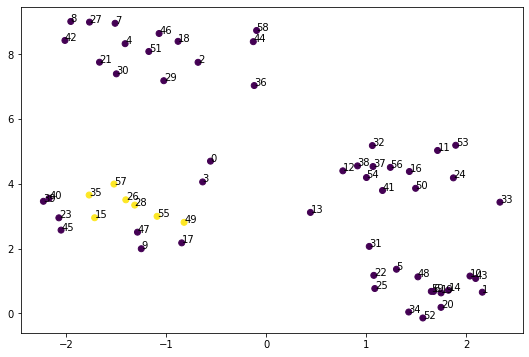

In [14]:
plt.figure(figsize = (9, 6))
plt.scatter(X[:,0], X[:,1], c=etiqueta2) # con color, marca los puntos de la etiqueta2

N   = len(X)
ind = np.arange(N)
for label, x, y in zip(ind, X[:,0], X[:,1]):
    plt.annotate(label, xy=(x, y))
plt.show()

In [15]:
# Una vez que marco con amarillo, hay que preguntarse cuales de esos puntos amarillos
# ahora son nucleos o centros, y los vecinos cercanos de esos nucleos, hay que 
# incorporarlos al cluster amarillo. Es decir, de un nucleo o centro, marcamos los 
# puntos directos, luego los puntos directos de los directos y asi sucesivamente
# hasta que no haya puntos directos o cercanos de ninguno.

# Para calcular todos los puntos alcanzables a los puntos del cluster
# se van agregando los alcanzables directos hasta que no haya mas nada que agregar
# hay que agregar y agregar puntos hasta que no haya ningun punto nuevo.

def agregaAlcanzablesTodos(C, X, etiqueta, epsilon, minPuntos):
    nuevoPunto = 1 
    etiquetaCopia = np.copy(etiqueta)
    # Mientras hayan nuevos puntos, agregar puntos alcanzables directos 
    while (nuevoPunto == 1): 
        etiquetaCopia2, nuevoPunto = agregaAlcanzablesDirectos(C, X, etiquetaCopia, epsilon, minPuntos)
        etiquetaCopia = np.copy(etiquetaCopia2)
    return (etiquetaCopia)

In [16]:
etiqueta2 = agregaAlcanzablesTodos(1, X, etiqueta, epsilon=1, minPuntos=5)
etiqueta2 

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0.])

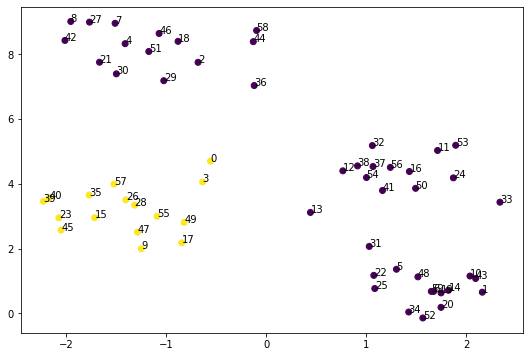

In [17]:
plt.figure(figsize = (9, 6))
plt.scatter(X[:,0], X[:,1], c=etiqueta2) # con color, marca los puntos de la etiqueta2

N   = len(X)
ind = np.arange(N)
for label, x, y in zip(ind, X[:,0], X[:,1]):
    plt.annotate(label, xy=(x, y))
plt.show()

In [18]:
# Ahora, definir una funcion que calcule para todos los clusters
def MyDBSCANcluster(X, epsilon, minPuntos):
    N = len(X)                  # Cantidad de datos
    etiqueta = np.zeros(N)      # Guardar a que cluster pertenece cada punto
    C = 0    # Indica el numero de cluster que estamos construyendo
    
    for i in range(N):
        if (etiqueta[i] == 0): # Si los datos, no estan asignados en ninguna etiqueta
            # busca los vecinos de esos datos a un radio epsilon.
            vecinos = buscarVecinos(X[i], X, epsilon) 
            # Si los vecinos son mayor o igual a un numero minimo de puntos (minPuntos)
            # entonces, es un punto nucleo o centro.
            if len(vecinos) >= minPuntos : 
                # Construimos el cluster correspondiente de ese nucleo
                C = C + 1
                etiqueta[i] = C 
                etiqueta = agregaAlcanzablesTodos(C, X, etiqueta, epsilon, minPuntos)
            else:
                # Si no es un nodo, lo marcamos como ruido (con -1)
                etiqueta[i] = -1
    # devuelve el vector de etiquetas
    return (etiqueta)

In [19]:
etiqueta = MyDBSCANcluster(X, epsilon = 1, minPuntos = 5) # aumentar el radio a 1 
etiqueta 

array([3., 1., 2., 3., 2., 1., 1., 2., 2., 3., 1., 4., 4., 4., 1., 3., 4.,
       3., 2., 1., 1., 2., 1., 3., 4., 1., 3., 2., 3., 2., 2., 1., 4., 4.,
       1., 3., 2., 4., 4., 3., 3., 4., 2., 1., 2., 3., 2., 3., 1., 3., 4.,
       2., 1., 4., 4., 3., 4., 3., 2., 1.])

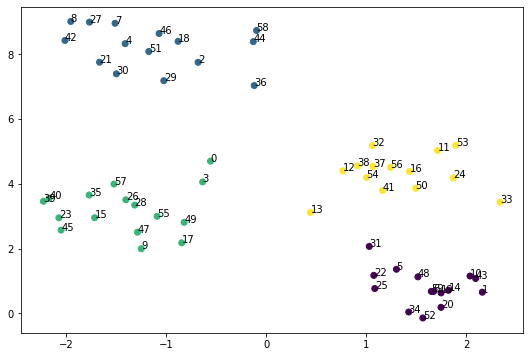

In [20]:
plt.figure(figsize = (9, 6))
plt.scatter(X[:,0], X[:,1], c=etiqueta) # con color, marca los puntos de la etiqueta2

N   = len(X)
ind = np.arange(N)
for label, x, y in zip(ind, X[:,0], X[:,1]):
    plt.annotate(label, xy=(x, y))
plt.show()